# Exercise 4.10.3 Comparisons to region and dept

This script contains

7. Customer profile usage frequency and expenditure
8. Compare customer profiles to region and dept
9. Create visualizations

# Import libraries

In [3]:
# import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
# path to InstaCart folders

path = r"C:\Users\ivand\OneDrive\Desktop\Careerfoundry\IT_Instacart Baskey Analysis"

In [5]:
# import df_ords_prods_cust_depts_merged from Prepared Data folder

df_ords_prods_cust_depts_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_ords_prods_cust_depts_merged.pkl'))

# 07 Customer profile usage frequency and expenditure

In [6]:
# Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure
## Customer profiles include: age_group, income_group, fam_status_flag, department

In [7]:
# check output to review column names

df_ords_prods_cust_depts_merged.head(2)

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,date_joined,n_dependants,fam_status,income,region,activity_flag,age_group,income_group,fam_status_flag,department
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,2/17/2019,3,married,40423,South,normal activity,Young adult (18-33),Low income,Married with children,beverages
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,2/17/2019,3,married,40423,South,normal activity,Young adult (18-33),Low income,Married with children,beverages


In [8]:
# check shape to make sure it's the correct file

df_ords_prods_cust_depts_merged.shape

(30964564, 37)

In [9]:
# Age group aggregate

age_group_agg = df_ords_prods_cust_depts_merged.groupby('age_group').agg({'order_number': ['mean', 'min', 'max'],  'prices': ['mean', 'min', 'max']})

In [10]:
age_group_agg

order_number             prices              
                            mean min max       mean  min      max
age_group                                                        
Adult (34-49)          17.966084   1  99  12.211524  1.0  99999.0
Adult (50-64)          17.837133   1  99  11.724176  1.0  99999.0
Senior (65+)           17.784952   1  99  11.757768  1.0  99999.0
Young adult (18-33)    17.750814   1  99  12.034861  1.0  99999.0

In [11]:
# Income group aggregate

income_group_agg = df_ords_prods_cust_depts_merged.groupby('income_group').agg({'order_number': ['mean', 'min', 'max'],  'prices': ['mean', 'min', 'max']})

In [12]:
income_group_agg

order_number             prices              
                      mean min max       mean  min      max
income_group                                               
High income      17.935826   1  99  21.959259  1.0  99999.0
Low income       17.470500   1  99   7.301387  1.0  14900.0
Medium income    17.962608   1  99   9.217006  1.0  99999.0

In [13]:
# Family status aggregate

fam_status_agg = df_ords_prods_cust_depts_merged.groupby('fam_status_flag').agg({'order_number': ['mean', 'min', 'max'],  'prices': ['mean', 'min', 'max']})

In [14]:
fam_status_agg

order_number             prices              
                              mean min max       mean  min      max
fam_status_flag                                                    
Married with children    17.778735   1  99  11.944390  1.0  99999.0
Single adult             17.957922   1  99  12.102657  1.0  99999.0
Young adult              18.000712   1  99  10.890167  1.0  99999.0

In [15]:
# department aggregate

department_agg = df_ords_prods_cust_depts_merged.groupby('department').agg({'order_number': ['mean', 'min', 'max'],  'prices': ['mean', 'min', 'max']})

In [16]:
department_agg

order_number             prices              
                        mean min max       mean  min      max
department                                                   
alcohol            16.034226   1  99   8.150699  1.0     15.0
babies             19.867090   1  99   7.634399  1.0     15.0
bakery             17.856619   1  99   7.857482  1.0     15.0
beverages          17.901479   1  99   7.682556  1.0     15.0
breakfast          17.469987   1  99   8.031647  1.0     14.9
bulk               20.797555   1  99   8.346919  1.4     14.1
canned goods       16.933858   1  99   7.546660  1.0     15.0
dairy eggs         18.324695   1  99  33.114599  1.0  99999.0
deli               17.144802   1  99   7.783347  1.0     15.0
dry goods pasta    16.633019   1  99   7.349370  1.0     15.0
frozen             16.160739   1  99   7.733725  1.0     15.0
household          16.438914   1  99   7.379951  1.0     15.0
international      17.174694   1  99   7.678797  1.0     15.0
meat seafood       16.576910   1  99  16.300034  8.0     25.0
missing            24.281327   1  99   8.660655  1.0     15.0
other              18.096481   1  99   6.961995  1.1     15.0
pantry             17.328319   1  99   8.014482  1.0     20.0
personal care      16.933392   1  99   7.998744  1.0     15.0
pets               15.995927   1  99   7.887489  1.0     15.0
produce            18.495730   1  99   7.980348  1.0     15.0
snacks             17.830354   1  99   4.275555  1.6      7.0

# 08 Compare customer profiles to region and dept

In [17]:
# Compare customer profiles with regions and departments
# Customers may demonstrate different behaviors across regions

In [18]:
# Crosstab age group with region

age_group_region = pd.crosstab(df_ords_prods_cust_depts_merged['age_group'], df_ords_prods_cust_depts_merged['region'], dropna = False)

In [19]:
age_group_region

region,Midwest,Northeast,South,West
age_group,,,,
Adult (34-49),1854288,1363436,2281738,2291362
Adult (50-64),1699665,1248575,2111586,2160905
Senior (65+),1904046,1484807,2394872,2411819
Young adult (18-33),1803514,1367867,2329294,2256790


In [20]:
# Crosstab income group with region

income_group_region = pd.crosstab(df_ords_prods_cust_depts_merged['income_group'], df_ords_prods_cust_depts_merged['region'], dropna = False)

In [21]:
income_group_region

region,Midwest,Northeast,South,West
income_group,,,,
High income,1843891,1374109,2254222,2280895
Low income,1770874,1354113,2293381,2243110
Medium income,3646748,2736463,4569887,4596871


In [22]:
# Crosstab family status with region

fam_status_region = pd.crosstab(df_ords_prods_cust_depts_merged['fam_status_flag'], df_ords_prods_cust_depts_merged['region'], dropna = False)

In [23]:
fam_status_region

region,Midwest,Northeast,South,West
fam_status_flag,,,,
Married with children,5087262,3853773,6389599,6413077
Single adult,1822816,1354482,2289601,2272782
Young adult,351435,256430,438290,435017


In [24]:
# Crosstab age group with department

age_group_dept = pd.crosstab(df_ords_prods_cust_depts_merged['department'], df_ords_prods_cust_depts_merged['age_group'], dropna = False)

In [25]:
age_group_dept

age_group,Adult (34-49),Adult (50-64),Senior (65+),Young adult (18-33)
department,,,,
alcohol,35893,33841,36693,38200
babies,107219,95660,106204,101309
bakery,281307,262218,295997,281306
beverages,643821,607039,684020,637021
breakfast,168301,157306,175296,169947
bulk,8530,7498,8945,8478
canned goods,253475,236038,267509,255052
dairy eggs,1307254,1195871,1368072,1305985
deli,253138,234391,265199,251106


In [26]:
# Crosstab income group with department

income_group_dept = pd.crosstab(df_ords_prods_cust_depts_merged['department'], df_ords_prods_cust_depts_merged['income_group'], dropna = False)

In [27]:
income_group_dept

income_group,High income,Low income,Medium income
department,,,
alcohol,41099,36650,66878
babies,105771,82803,221818
bakery,290807,261763,568258
beverages,619356,737043,1215502
breakfast,163094,185892,321864
bulk,7550,9320,16581
canned goods,266276,219841,525957
dairy eggs,1316016,1215904,2645262
deli,251347,245437,507050


In [28]:
# Crosstab family status with department

fam_status_dept = pd.crosstab(df_ords_prods_cust_depts_merged['department'], df_ords_prods_cust_depts_merged['fam_status_flag'], dropna = False)

In [29]:
fam_status_dept

fam_status_flag,Married with children,Single adult,Young adult
department,,,
alcohol,99421,36827,8379
babies,287683,103328,19381
bakery,785749,281395,53684
beverages,1807453,645341,119107
breakfast,471220,166432,33198
bulk,23818,8000,1633
canned goods,712577,251020,48477
dairy eggs,3632599,1294376,250207
deli,702333,253382,48119


# 09 Create visualizations

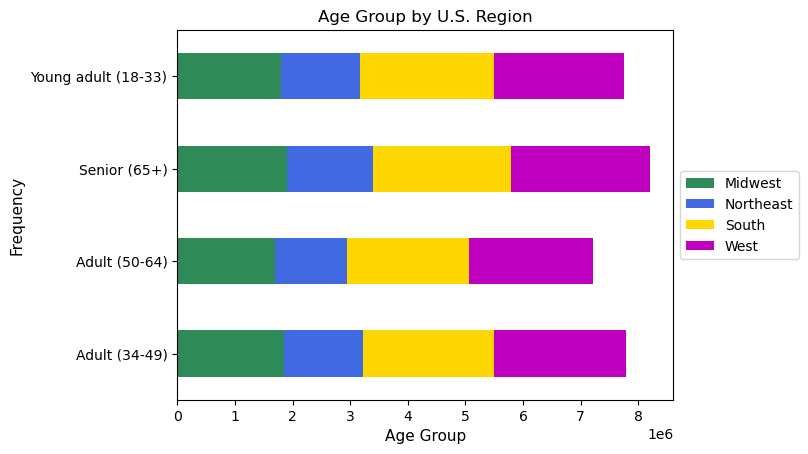

In [30]:
# Age group by region

age_group_region_bar = age_group_region.plot.barh(stacked = True, color = ['seagreen', 'royalblue', 'gold', 'm'])
plt.xlabel("Age Group", fontsize=11)
plt.ylabel("Frequency",fontsize=11)
plt.title("Age Group by U.S. Region", fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

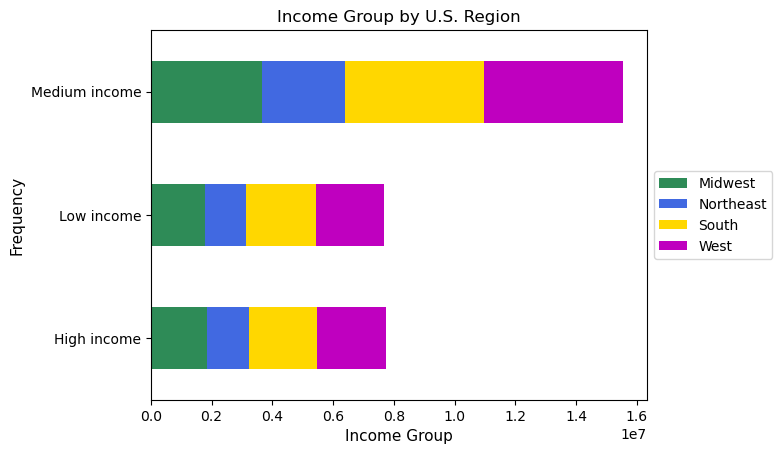

In [31]:
# Income group by region

income_group_region_bar = income_group_region.plot.barh(stacked = True, color = ['seagreen', 'royalblue', 'gold', 'm'])
plt.xlabel("Income Group", fontsize=11)
plt.ylabel("Frequency",fontsize=11)
plt.title("Income Group by U.S. Region", fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

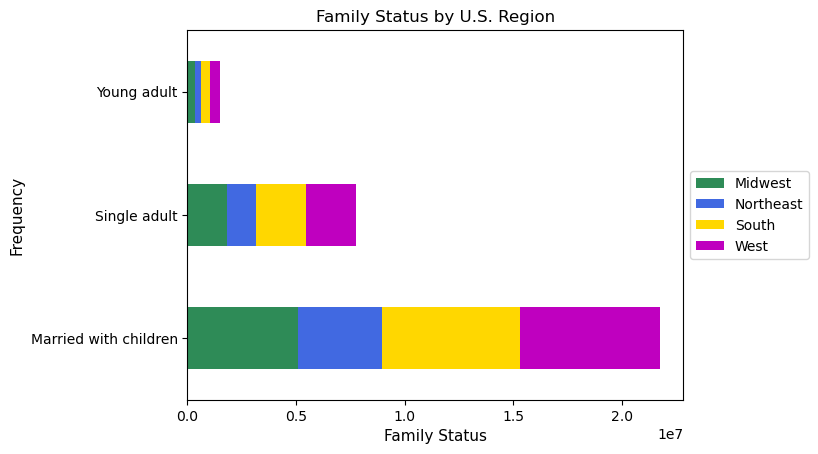

In [32]:
# Family Status by region

fam_status_region_bar = fam_status_region.plot.barh(stacked = True, color = ['seagreen', 'royalblue', 'gold', 'm'])
plt.xlabel("Family Status", fontsize=11)
plt.ylabel("Frequency",fontsize=11)
plt.title("Family Status by U.S. Region", fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

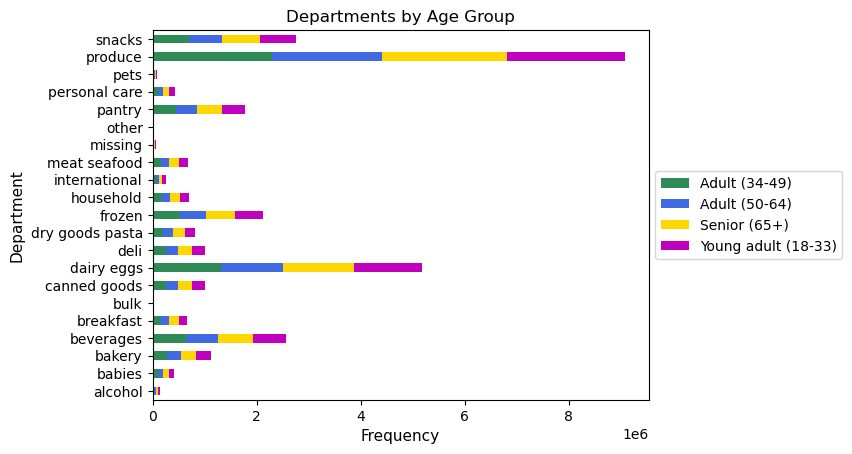

In [33]:
# age by department

age_group_dept_bar = age_group_dept.plot.barh(stacked = True, color = ['seagreen', 'royalblue', 'gold', 'm'])
plt.xlabel("Frequency", fontsize=11)
plt.ylabel("Department",fontsize=11)
plt.title("Departments by Age Group", fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

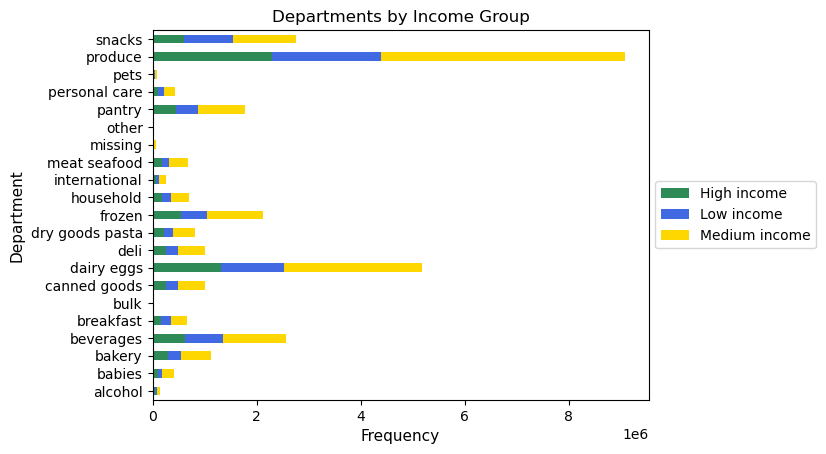

In [34]:
# income group by department

income_group_dept_bar = income_group_dept.plot.barh(stacked = True, color = ['seagreen', 'royalblue', 'gold', 'm'])
plt.xlabel("Frequency", fontsize=11)
plt.ylabel("Department",fontsize=11)
plt.title("Departments by Income Group", fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

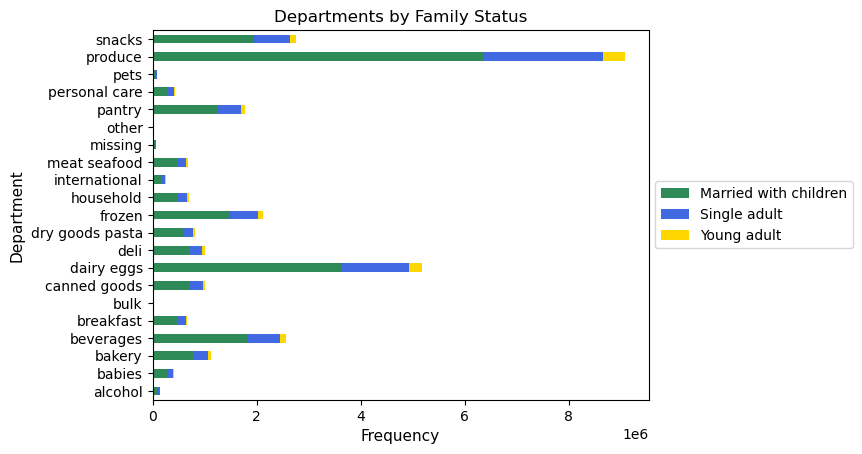

In [53]:
# family status by department

fam_status_dept_bar = fam_status_dept.plot.barh(stacked = True, color = ['seagreen', 'royalblue', 'gold', 'm'])
plt.xlabel("Frequency", fontsize=11)
plt.ylabel("Department",fontsize=11)
plt.title("Departments by Family Status", fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [55]:
# export age group region bar graph to visualizations folder

age_group_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_group_region_stackbar.png'))

In [56]:
# export income group region bar graph to visualizations folder

income_group_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_group_region_stackbar.png'))

In [57]:
# export family status region bar graph to visualizations folder

fam_status_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_status_region_stackbar.png'))

In [58]:
# export age group dept bar graph to visualizations folder

age_group_dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_group_dept_stackbar.png'))

In [59]:
# export income group dept bar graph to visualizations folder

income_group_dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_group_dept_stackbar.png'))

In [60]:
# export family status dept bar graph to visualizations folder

fam_status_dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'fam_status_dept_stackbar.png'))

In [ ]:
# In comparing customer profiles across U.S. regions, it seems that in the South and West regions customers have higher incomes and have families with 1 or more children.
# Married couples with children are more frequent customers. 